Since Amount and Time columns don't give much value, Amount can be normalized and Time can be dropped.

In [88]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE

df = pd.read_csv('C:\\Users\\Elliot\\Desktop\\data science datasets\\credit card fraud\\creditcard.csv') #filepath

from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
x = df.iloc[:, 1:]
y = df['Class']   
#split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=42)
sm = SMOTE(random_state = 42, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]
C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [98]:
from sklearn import  linear_model
log_reg = linear_model.LogisticRegression(C=1e5)  #C is a high number to not normalize
log_reg.fit(x_train_res, y_train_res)
#print(log_reg.score(x_test, y_test))

y_expected = np.array(log_reg.predict(x_test))
y_actual = np.array(y_test)

print('Validation Results')
print(log_reg.score(x_test, y_test))
print(recall_score(y_test, log_reg.predict(x_test)))
print('\nTest Results')
print(log_reg.score(x_test, y_test))
print(recall_score(y_test, log_reg.predict(x_test)))


Validation Results
1.0
1.0

Test Results
1.0
1.0


Since we oversample on just training data, no information from the test set should be given away to the training set. Let's take a look at the confusion matrix.

Confusion matrix:
Predicted      0   1  __all__
Actual                       
0          56863   1    56864
1              0  98       98
__all__    56863  99    56962


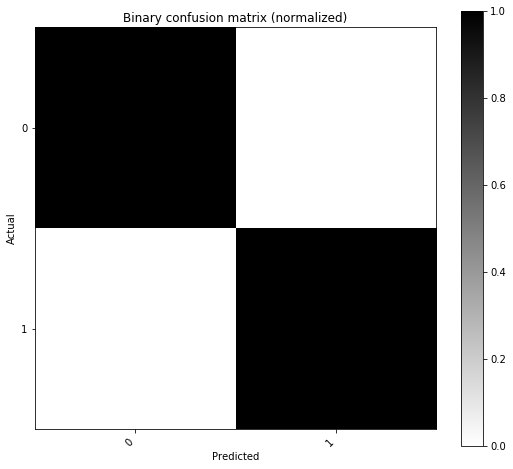

population: 56962
P: 98
N: 56864
PositiveTest: 99
NegativeTest: 56863
TP: 98
TN: 56863
FP: 1
FN: 0
TPR: 1.0
TNR: 0.999982414181
PPV: 0.989898989899
NPV: 1.0
FPR: 1.75858187957e-05
FDR: 0.010101010101
FNR: 0.0
ACC: 0.999982444437
F1_score: 0.994923857868
MCC: 0.9949279279
informedness: 0.999982414181
markedness: 0.989898989899
prevalence: 0.00172044520909
LRP: 56864.0
LRN: 0.0
DOR: inf
FOR: 0.0


C:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:346: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


In [93]:
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
cm = ConfusionMatrix(y_actual, y_expected)
print("Confusion matrix:\n%s" % cm)
cm.plot(normalized=True)
plt.show()
cm.print_stats()

Instead of oversampling, undersampling might do better. Let's import the dataset.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv('C:\\Users\\Elliot\\Desktop\\data science datasets\\credit card fraud\\creditcard.csv') #filepath


#preprocessing
from sklearn.preprocessing import StandardScaler
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)

x = df.iloc[:, 1:]
y = df['Class']

#Undersample, then do the customary train/test split

rus = RandomUnderSampler(ratio = 'majority')
x_res, y_res = rus.fit_sample(x,y)
#print(x_res.shape, y_res.shape)
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = .2, random_state = 42) #split into test/train set



C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


Validation Results
0.994923857868
0.989795918367

Test Results
0.994923857868
0.989795918367
Confusion matrix:
Predicted    0   1  __all__
Actual                     
0           99   0       99
1            1  97       98
__all__    100  97      197


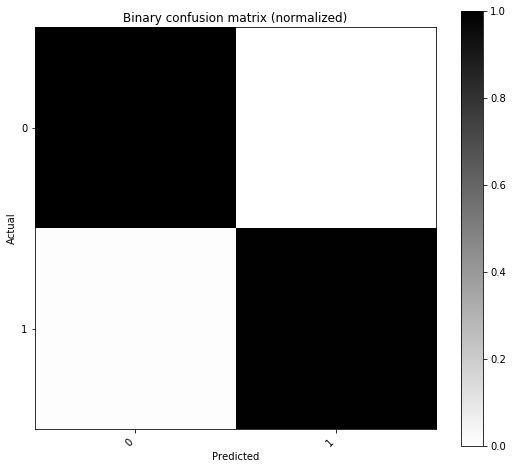

population: 197
P: 98
N: 99
PositiveTest: 97
NegativeTest: 100
TP: 97
TN: 99
FP: 0
FN: 1
TPR: 0.989795918367
TNR: 1.0
PPV: 1.0
NPV: 0.99
FPR: 0.0
FDR: 0.0
FNR: 0.0102040816327
ACC: 0.994923857868
F1_score: 0.994871794872
MCC: 0.989897953924
informedness: 0.989795918367
markedness: 0.99
prevalence: 0.497461928934
LRP: inf
LRN: 0.0102040816327
DOR: inf
FOR: 0.01


C:\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [95]:
#The Logistic Regression model

from sklearn import  linear_model
log_reg = linear_model.LogisticRegression(C=1e5)  #C is a high number to not normalize
log_reg.fit(x_train, y_train)
#print(log_reg.score(x_test, y_test))

y_expected = np.array(log_reg.predict(x_test))
y_actual = np.array(y_test)

print('Validation Results')
print(log_reg.score(x_test, y_test))
print(recall_score(y_test, log_reg.predict(x_test)))
print('\nTest Results')
print(log_reg.score(x_test, y_test))
print(recall_score(y_test, log_reg.predict(x_test)))

#Confusion Matrix / accompanying statistics...

from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
cm = ConfusionMatrix(y_actual, y_expected)
print("Confusion matrix:\n%s" % cm)
cm.plot(normalized=True)
plt.show()
cm.print_stats()

In conclusion, both Over/undersampling did fine. The synthetic samples seem to do fine, despite having such a big class imbalance in the set beforehand. However, I will be looking into how to generalize this model better because there is a high chance this model was overfit.